## 3.6.2 Simple Linear Regression

In [1]:
#loading statistical packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

In [2]:
#importing Boston dataset
boston = pd.read_csv('Boston.csv')
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [3]:
#fitting basic OLS
model = sm.OLS.from_formula('medv~lstat', data = boston)
#getting basic summary results
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           5.08e-88
Time:                        16:52:30   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
#quantities of interest that can be extracted
dir(results)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',

In [5]:
#getting coefficients
print(results.params)

Intercept    34.553841
lstat        -0.950049
dtype: float64


In [6]:
#getting confidence intervals
print(results.conf_int())

                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951


In [10]:
#creating sample data to predict
#create df with predictor variable column
prediction_df = pd.DataFrame({'lstat':[5,10,15]})
prediction_df

,lstat
0,5
1,10
2,15


In [12]:
#dataframe of prediction intervals and confidence intervals
#mean_ci -> confidence interval
#obs_ci -> observation confidence interval a.k.a. prediction interval
predictions = results.get_prediction(prediction_df)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


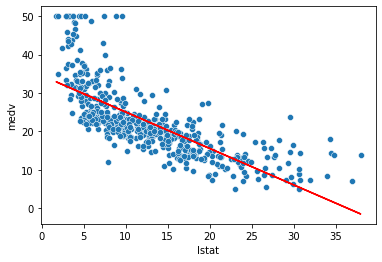

In [24]:
#plotting regression line over scatterplot of the data
sns.scatterplot(x='lstat', y='medv', data=boston)
plt.plot(boston.lstat, results.fittedvalues, 'r')

<AxesSubplot:xlabel='lstat', ylabel='medv'>

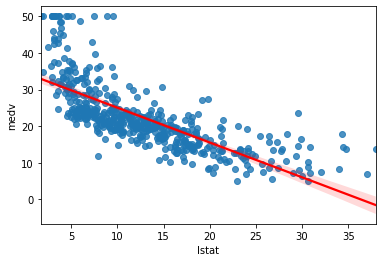

In [28]:
#note that certain seaborn plots have regression plots built in (with confidence intervals)
sns.regplot(x='lstat', y='medv', data=boston, line_kws = {'color': 'red'})

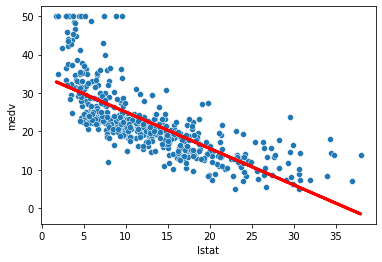

In [31]:
#changing line width
sns.scatterplot(x='lstat', y='medv', data=boston)
plt.plot(boston.lstat, results.fittedvalues, 'r', linewidth=3)

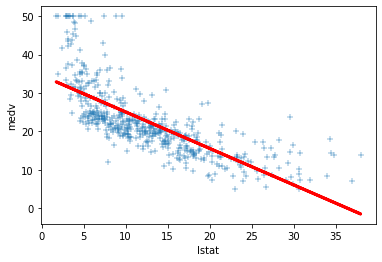

In [37]:
#changing plotting symbols
sns.scatterplot(x='lstat', y='medv', data=boston, marker='+')
plt.plot(boston.lstat, results.fittedvalues, 'r', linewidth=3)

### Regression Diagnostic Plots
R has four built-in diagnostic plots which we will try to recreate with python  
1.Residuals plotted against Fitted Values  
2.Normal QQ plot of residuals  
3.Scale-location plot (which is used to check for homoscedacity)  
4.Residuals (or studentized residuals) against 

#### Residuals plotting against fitted

<AxesSubplot:>

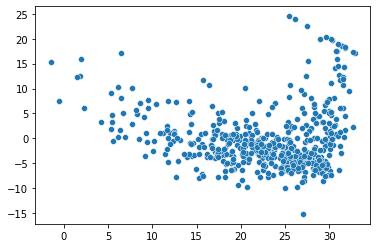

In [39]:
#getting fitted values and residuals
fitted_val = results.fittedvalues
residuals = results.resid
sns.scatterplot(x=fitted_val, y=residuals)

<AxesSubplot:xlabel='Fitted Values', ylabel='Residuals'>

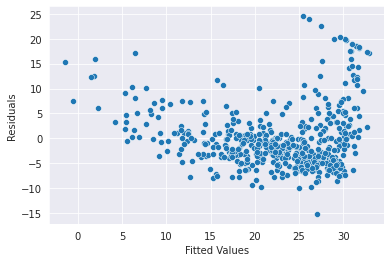

In [41]:
#cleaning up the chart
#setting theme to darkgrid
sns.set_style('darkgrid')
fitted_values = pd.Series(fitted_val, name='Fitted Values')
residuals = pd.Series(residuals, name='Residuals')
sns.scatterplot(x=fitted_values, y=residuals)

Above we can see that the relationship seems to not be entirely linear

#### plotting the QQ plot to check for normality

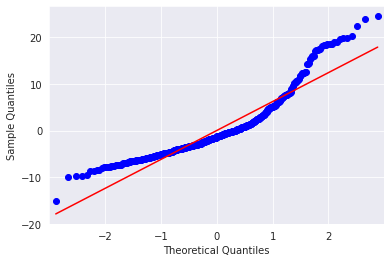

In [54]:
import statsmodels.api as sm 
import pylab as py 

sm.qqplot(results.resid, line='s') 
plt.show() 

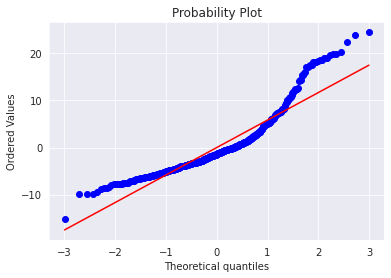

In [55]:
import scipy
scipy.stats.probplot(results.resid, dist='norm', plot =plt)
plt.show()

#### Plotting scale-location chart to check for heteroscedacity

<AxesSubplot:xlabel='Fitted Values', ylabel='S. Residuals'>

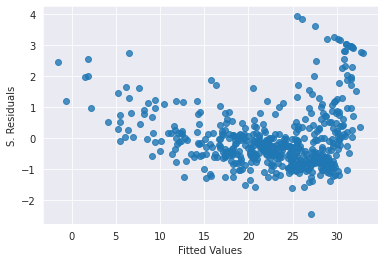

In [57]:
s_residuals = pd.Series(results.resid_pearson, name="S. Residuals")
sns.regplot(x=fitted_values, y=s_residuals,  fit_reg=False)

like R, lets try plotting scale-location with square root of standardized values against fitting values

<AxesSubplot:xlabel='Fitted Values', ylabel='S. Residuals'>

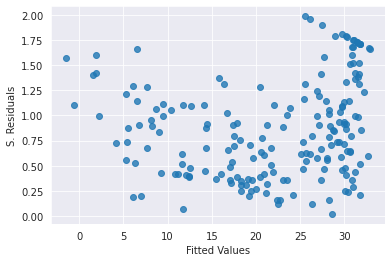

In [61]:
sqrt_standResid = np.sqrt(s_residuals)
sns.regplot(x=fitted_values, y=sqrt_standResid,  fit_reg=False)

#### plotting an influence plot to look for leverage and outliers

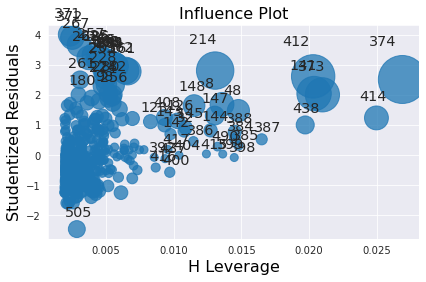

In [67]:
sm.graphics.influence_plot(results, criterion='Cooks').tight_layout(pad=1.0)


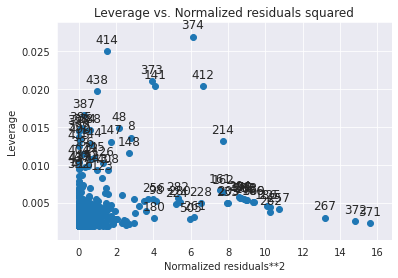

In [70]:
sm.graphics.plot_leverage_resid2(results)
plt.show()

#### Getting observation with highest leverage

In [71]:
import statsmodels.stats.outliers_influence as o_i

In [82]:
infl = o_i.OLSInfluence(results)
infDf=infl.summary_frame()

In [83]:
infDf

,dfb_Intercept,dfb_lstat,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.059716,0.044977,0.001886,-0.938750,0.004263,-0.061420,-0.938639,-0.061413
1,-0.028156,0.015069,0.000582,-0.687871,0.002456,-0.034128,-0.687511,-0.034110
2,0.044083,-0.034510,0.001004,0.641041,0.004864,0.044815,0.640666,0.044789
3,0.019757,-0.016039,0.000198,0.264480,0.005640,0.019918,0.264236,0.019900
4,0.066762,-0.049471,0.002384,1.081699,0.004059,0.069053,1.081882,0.069065
...,...,...,...,...,...,...,...,...
501,-0.018179,0.008887,0.000266,-0.477868,0.002322,-0.023053,-0.477502,-0.023035
502,-0.035414,0.019126,0.000912,-0.858140,0.002472,-0.042719,-0.857915,-0.042708
503,-0.051219,0.037367,0.001421,-0.853618,0.003886,-0.053317,-0.853387,-0.053303
504,-0.057161,0.039732,0.001843,-1.031025,0.003456,-0.060717,-1.031090,-0.060721


In [85]:
infDf.loc[infDf.hat_diag==infDf.hat_diag.max(), :]

,dfb_Intercept,dfb_lstat,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
374,-0.294291,0.401657,0.086162,2.498416,0.026865,0.415119,2.511537,0.4173


In [86]:
infDf.iloc[414, :]

dfb_Intercept     -0.137901
dfb_lstat          0.189670
cooks_d            0.019514
standard_resid     1.234823
hat_diag           0.024957
dffits_internal    0.197554
student_resid      1.235468
dffits             0.197657
Name: 414, dtype: float64